# Example of signal decomposition problem

In [1]:
import cvxpy as cvx
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
import seaborn as sns
sns.set_style('darkgrid')
sns.set_context('paper')

In [2]:
def calc_obj(x1, x2, x3, rho1=1, rho2=1e7, rho3=1e1):
    t1 = rho1 * np.sum(np.power(x1, 2))
    t2 = rho2 * np.sum(np.power(np.diff(x2, 2), 2))
    t3 = rho3 * np.sum(np.abs(np.diff(x3, 1)))
    return t1 + t2 + t3

## Construct composite signal for decomposition

The observed signal $y$ is the problem data for the Signal Decomposition (SD) problem.

In [3]:
np.random.seed(42)
t = np.linspace(0, 1000, 3000)
signal1 = np.sin(2 * np.pi * t * 1 / (500.))
signal2 = signal.square(2 * np.pi * t * 1 / (450.))
y = signal1 + signal2 + 0.25 * np.random.randn(len(signal1))

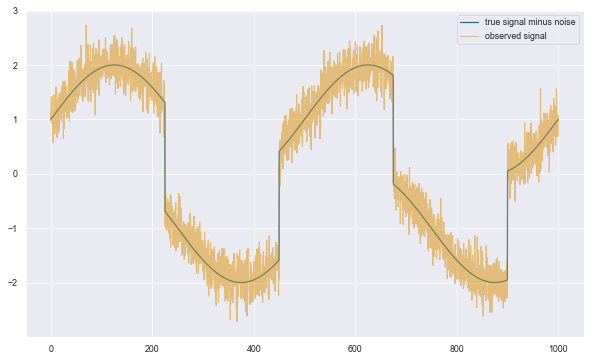

In [4]:
plt.figure(figsize=(10, 6))
plt.plot(t, signal1 + signal2, label='true signal minus noise')
plt.plot(t, y, alpha=0.5, label='observed signal')
plt.legend()
plt.show()

## OSQP results

In [5]:
weights = np.array([1., 1e7, 1e1])
n = len(y)
x1 = cvx.Variable(n)
x2 = cvx.Variable(n)
x3 = cvx.Variable(n)
t1 = cvx.sum_squares(x1)
t2 = cvx.sum_squares(cvx.diff(x2, 2))
t3 = cvx.norm1(cvx.diff(x3, 1))
cost = weights.dot([t1, t2, t3])
objective = cvx.Minimize(cost)
constraints = [x1 + x2 + x3 == y, cvx.sum(x3) == 0]
problem = cvx.Problem(objective, constraints)
problem.solve(solver='OSQP')

255.7447833983191

In [6]:
problem.value

255.7447833983191

In [7]:
problem.objective.value

261.91690210153934

In [8]:
calc_obj(x1.value, x2.value, x3.value, weights[0], weights[1], weights[2])

261.91690210153934

## OSQP results, different algorithm parameters

In [9]:
weights = np.array([1., 1e7, 1e1])
n = len(y)
x1 = cvx.Variable(n)
x2 = cvx.Variable(n)
x3 = cvx.Variable(n)
t1 = cvx.sum_squares(x1)
t2 = cvx.sum_squares(cvx.diff(x2, 2))
t3 = cvx.norm1(cvx.diff(x3, 1))
cost = weights.dot([t1, t2, t3])
objective = cvx.Minimize(cost)
constraints = [x1 + x2 + x3 == y, cvx.sum(x3) == 0]
problem = cvx.Problem(objective, constraints)
problem.solve(solver='OSQP',eps_abs=1e-8, eps_rel=1e-8, max_iter=100000, verbose=False)

261.2772904391081

In [10]:
problem.value

261.2772904391081

In [11]:
problem.objective.value

261.2936521111793

In [12]:
calc_obj(x1.value, x2.value, x3.value, weights[0], weights[1], weights[2])

261.2936521111793

## MOSEK results

In [18]:
weights = np.array([1., 1e7, 1e1])
n = len(y)
x1 = cvx.Variable(n)
x2 = cvx.Variable(n)
x3 = cvx.Variable(n)
t1 = cvx.sum_squares(x1)
t2 = cvx.sum_squares(cvx.diff(x2, 2))
t3 = cvx.norm1(cvx.diff(x3, 1))
cost = weights.dot([t1, t2, t3])
objective = cvx.Minimize(cost)
constraints = [x1 + x2 + x3 == y, cvx.sum(x3) == 0]
problem = cvx.Problem(objective, constraints)
problem.solve(solver='MOSEK')

261.29292637109756

In [19]:
problem.value

261.29292637109756

In [20]:
problem.objective.value

261.29443338132603

In [21]:
calc_obj(x1.value, x2.value, x3.value, weights[0], weights[1], weights[2])

261.29443338132603

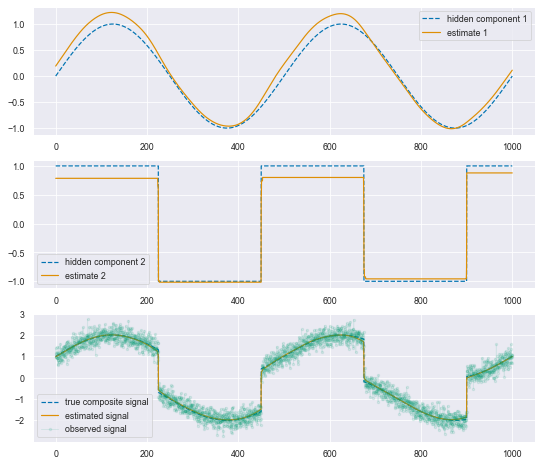

In [22]:
fig, ax = plt.subplots(nrows=3, figsize=(10//1.1, 12//1.5))
ax[0].plot(t, signal1, label='hidden component 1', ls='--')
ax[0].plot(t, x2.value, label='estimate 1')
ax[1].plot(t, signal2, label='hidden component 2', ls='--')
ax[1].plot(t, x3.value, label='estimate 2')
ax[2].plot(t, signal1 + signal2, label='true composite signal', ls='--')
ax[2].plot(t, x2.value + x3.value, label='estimated signal');
ax[2].plot(t, y, label='observed signal', linewidth=1, marker='.', alpha=0.1);
for a in ax:
    a.legend()